In [1]:
# ###################################################
# Change current directory to the root of the project
import os
from pathlib import Path
current_dir = Path(os.getcwd())
os.chdir(current_dir.parents[1])
# ###################################################

In [2]:
import matplotlib.pyplot as plt
from cir.benchmarks.cir_slot_based import cir_slot_cifar100
from cir.utils.notebook_plot_utils import plot_scenario_transition


Generating benchmark 1/5 ...

Generating benchmark 2/5 ...

Generating benchmark 3/5 ...

Generating benchmark 4/5 ...

Generating benchmark 5/5 ...


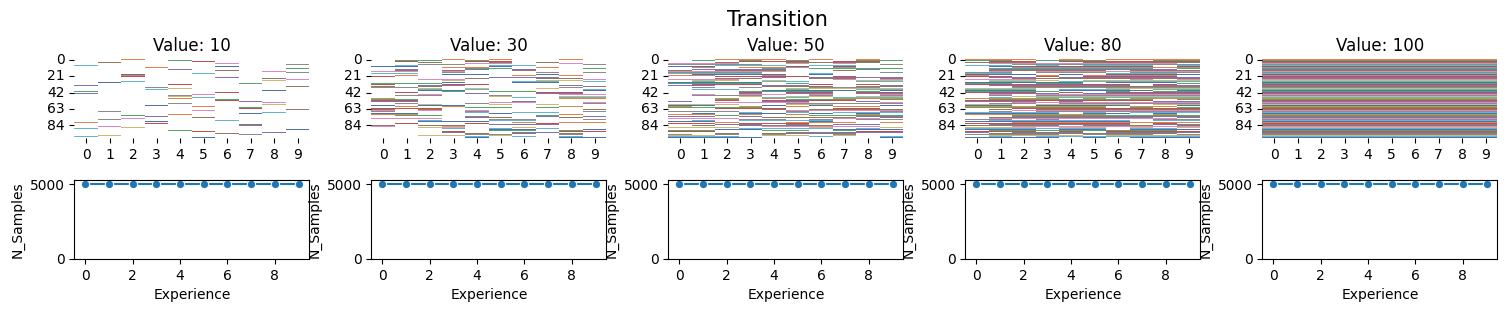

In [3]:
benchmarks = []
scenario_tables = []
n_samples_per_exp_list = []

variable_values = [10, 30, 50, 80, 100]
N=10,

for i, value in enumerate(variable_values):
    print(f"\nGenerating benchmark {i+1}/{len(variable_values)} ...")

    dataset_root = "./data/datasets"
    dist_first_occurrence = {'dist_type': 'geometric', 'p': value}
    dist_recurrence = {'dist_type': 'fixed', 'p': 0.2}
    benchmark = cir_slot_cifar100(
    dataset_root=dataset_root,
        N=10,
        K=value,
        seed=5
    )

    benchmarks.append(benchmark)
    scenario_tables.append(benchmark.details["stream_table"],)
    n_samples_per_exp_list.append(benchmark.details["n_samples_per_exp"])

plot_scenario_transition(scenario_tables, n_samples_per_exp_list, "Transition", variable_values)
plt.savefig("./transition.pdf")